In [6]:
import pandas as pd    # a wonderful dataframe to work with
import numpy as np     # adding a number of mathematical and science functions
import seaborn as sns  # a very easy to use statistical data visualization package
import matplotlib.pyplot as plt # a required plotting tool
import warnings
# sklearn is a big source of pre-written and mostly optimized ML algorithms.
# Here we use their Decision trees, Support Vector Machines, and the classic Perceptron. 
from sklearn import preprocessing, svm   
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
#ignore warnings
warnings.filterwarnings('ignore')




In [9]:
data = pd.read_csv('..\Downloads\stu_performance.csv')
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [8]:
data.tail()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L
479,F,Jordan,Jordan,MiddleSchool,G-08,A,History,S,Father,35,14,23,62,No,Bad,Above-7,L


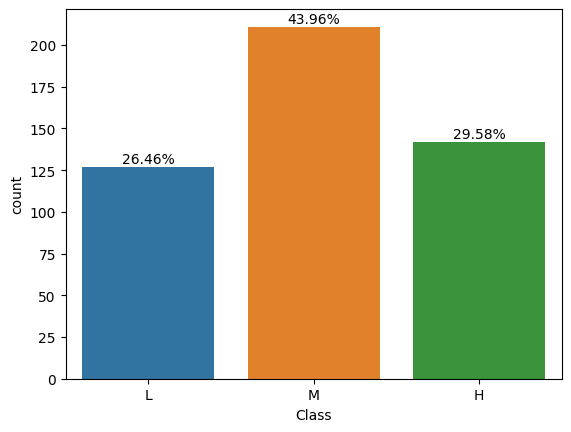

In [10]:
ax = sns.countplot(x='Class', data=data, order=['L', 'M', 'H'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

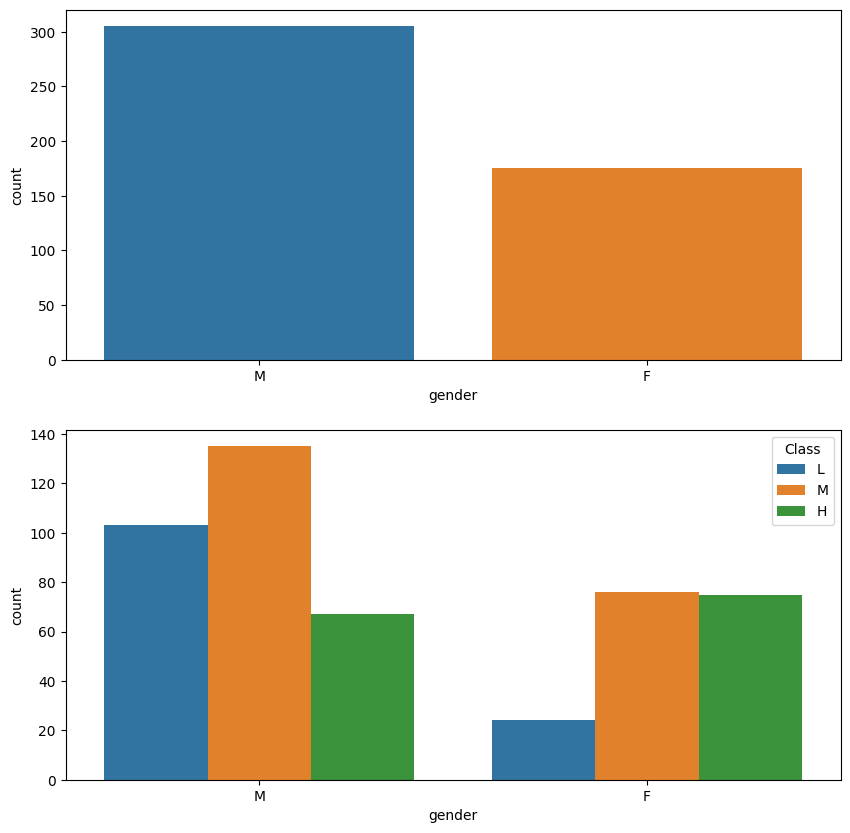

In [10]:
fig, axarr  = plt.subplots(2,figsize=(10,10))
sns.countplot(x='gender', data=data, order=['M','F'], ax=axarr[0])
sns.countplot(x='gender', hue='Class', data=data, order=['M', 'F'],hue_order = ['L', 'M', 'H'], ax=axarr[1])
plt.show()

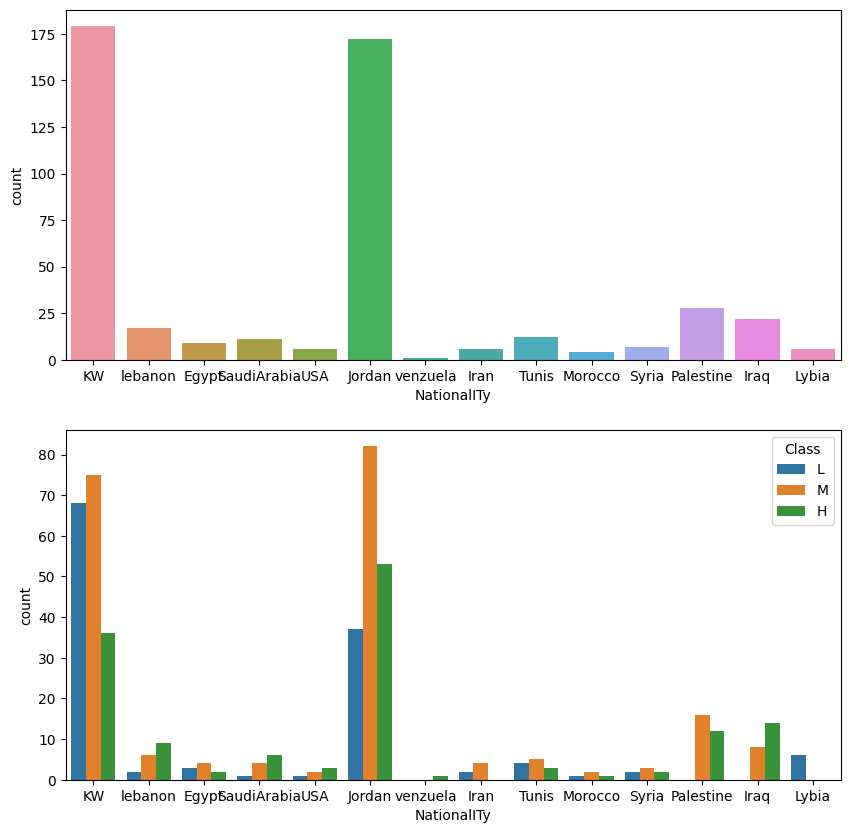

In [11]:
fig, axarr  = plt.subplots(2,figsize=(10,10))
sns.countplot(x='NationalITy', data=data, ax=axarr[0])
sns.countplot(x='NationalITy', hue='Class', data=data,hue_order = ['L', 'M', 'H'], ax=axarr[1])
plt.show()

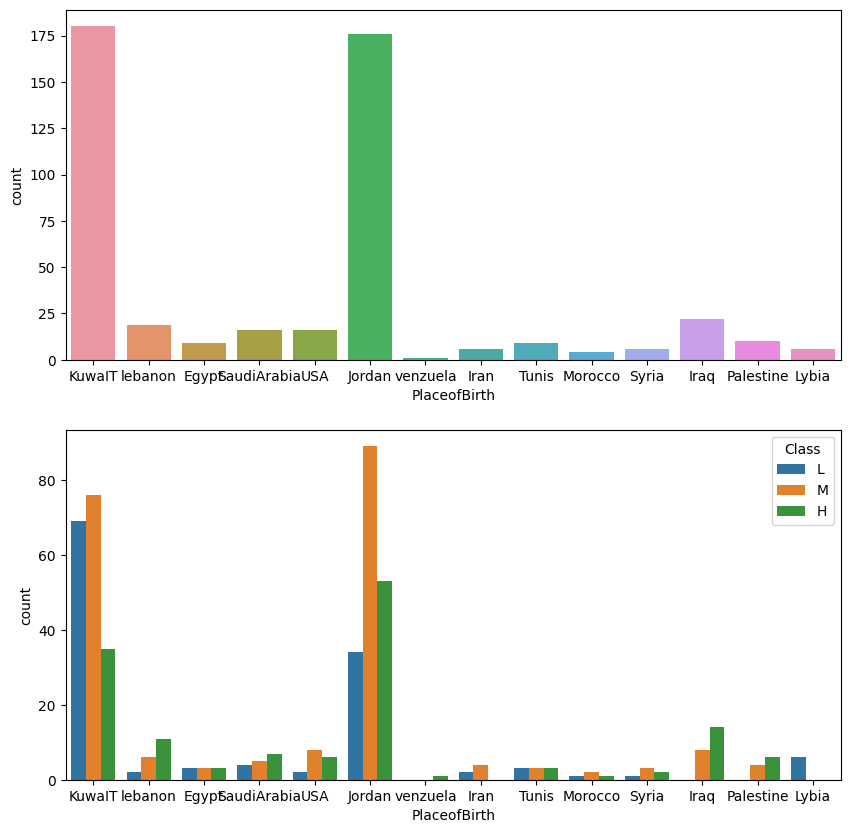

In [12]:
fig, axarr  = plt.subplots(2,figsize=(10,10))
sns.countplot(x='PlaceofBirth', data=data, ax=axarr[0])
sns.countplot(x='PlaceofBirth', hue='Class', data=data,hue_order = ['L', 'M', 'H'], ax=axarr[1])
plt.show()

In [13]:
data.shape

(480, 17)

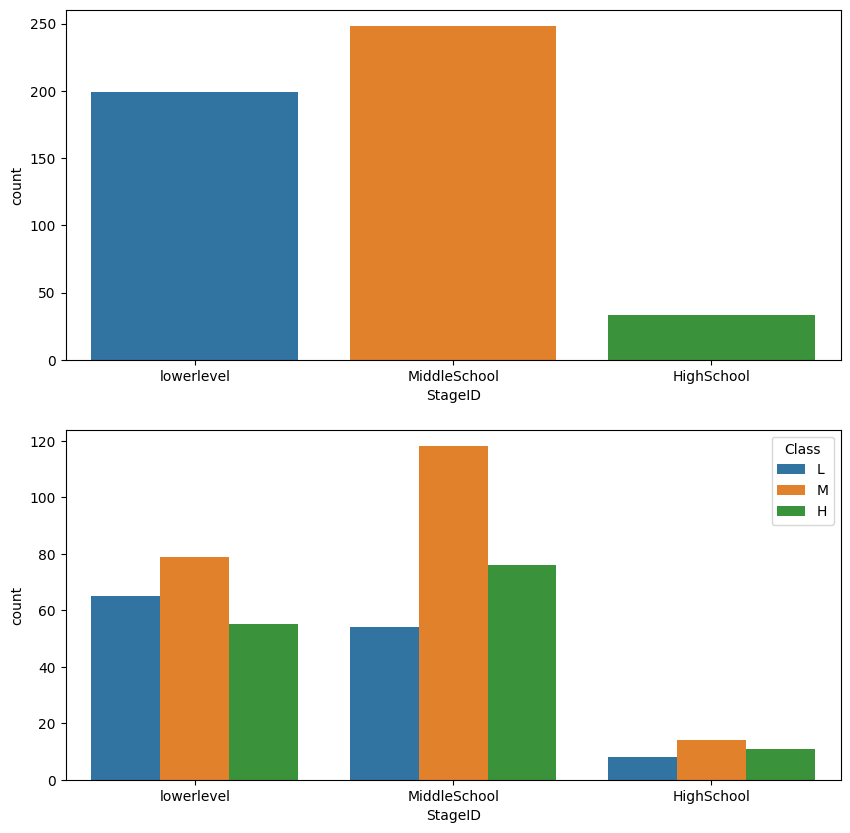

In [11]:
fig, axarr  = plt.subplots(2,figsize=(10,10))
sns.countplot(x='StageID', data=data, ax=axarr[0])
sns.countplot(x='StageID', hue='Class', data=data, hue_order = ['L', 'M', 'H'], ax=axarr[1])
plt.show()

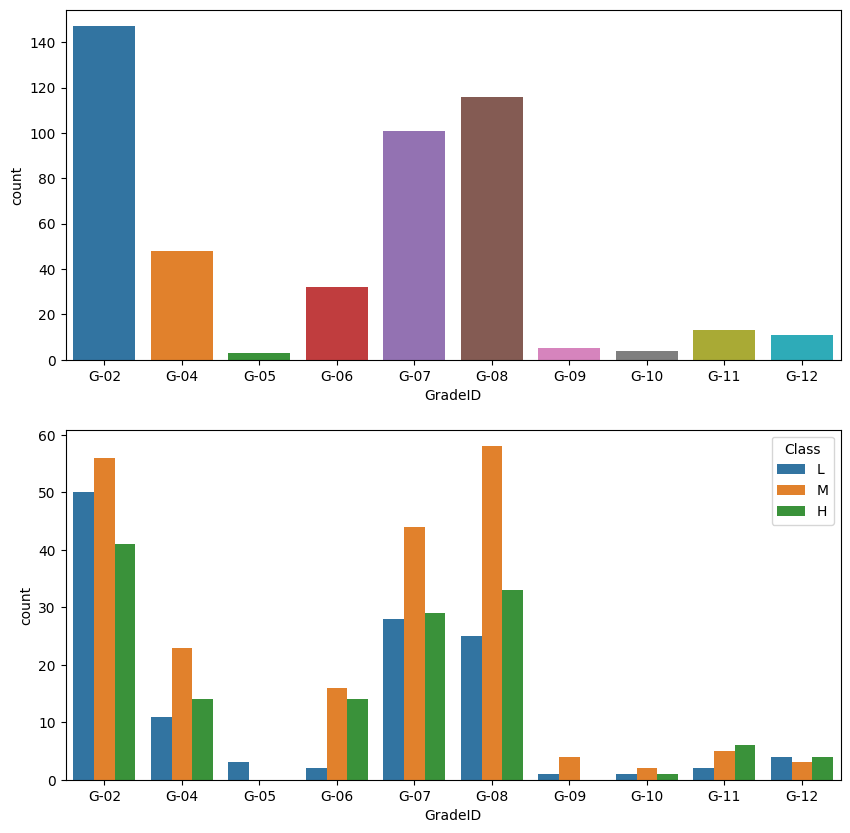

In [12]:
fig, axarr  = plt.subplots(2,figsize=(10,10))
sns.countplot(x='GradeID', data=data, order=['G-02', 'G-04', 'G-05', 'G-06', 'G-07', 'G-08', 'G-09', 'G-10', 'G-11', 'G-12'], ax=axarr[0])
sns.countplot(x='GradeID', hue='Class', data=data, order=['G-02', 'G-04', 'G-05', 'G-06', 'G-07', 'G-08', 'G-09', 'G-10', 'G-11', 'G-12'], hue_order = ['L', 'M', 'H'], ax=axarr[1])
plt.show()

In [13]:
data.loc[data['GradeID'] == 'G-05']

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
33,M,KW,KuwaIT,lowerlevel,G-05,A,English,F,Father,8,22,9,40,No,Bad,Above-7,L
46,M,KW,KuwaIT,lowerlevel,G-05,A,English,F,Father,7,10,1,30,No,Bad,Above-7,L
60,F,Jordan,Jordan,lowerlevel,G-05,A,English,F,Mum,21,10,28,20,No,Good,Above-7,L


In [14]:
data.loc[data['GradeID'] == 'G-09']

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
42,M,KW,KuwaIT,HighSchool,G-09,A,IT,F,Father,10,12,7,33,Yes,Good,Above-7,L
43,F,KW,KuwaIT,HighSchool,G-09,A,IT,F,Father,30,35,28,90,Yes,Good,Under-7,M
44,F,KW,KuwaIT,HighSchool,G-09,A,IT,F,Father,33,33,30,90,No,Bad,Under-7,M
76,M,Iran,Iran,HighSchool,G-09,A,IT,F,Mum,15,70,37,44,Yes,Good,Under-7,M
77,M,KW,KuwaIT,HighSchool,G-09,A,IT,F,Father,20,80,33,33,Yes,Good,Under-7,M


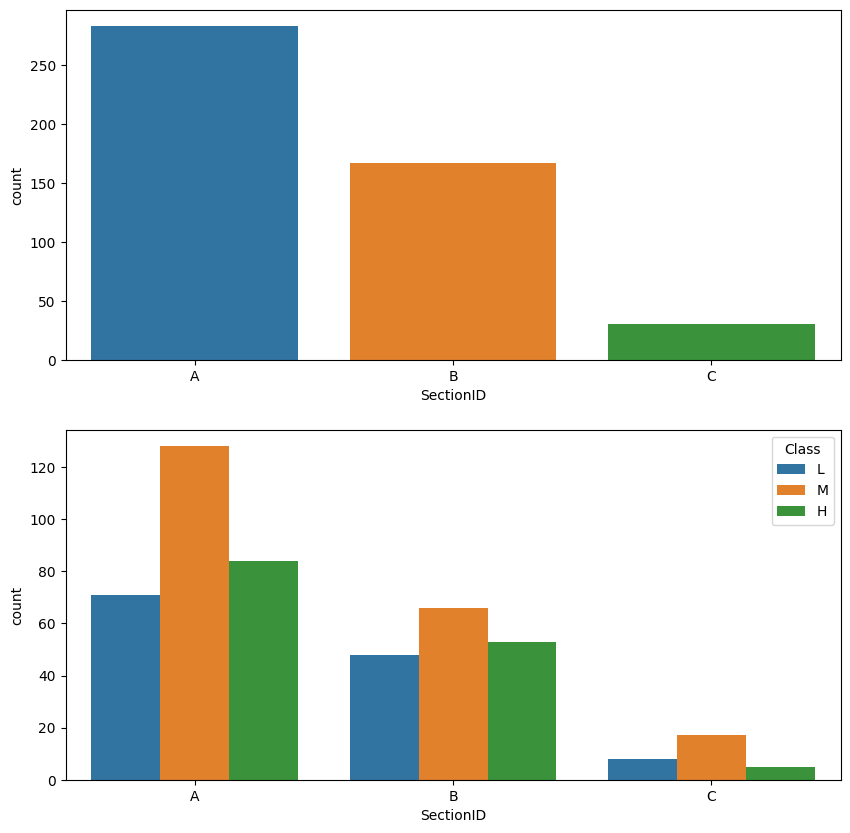

In [15]:
fig, axarr  = plt.subplots(2,figsize=(10,10))
sns.countplot(x='SectionID', data=data, order=['A', 'B', 'C'], ax = axarr[0])
sns.countplot(x='SectionID', hue='Class', data=data, order=['A', 'B', 'C'],hue_order = ['L', 'M', 'H'], ax = axarr[1])
plt.show()

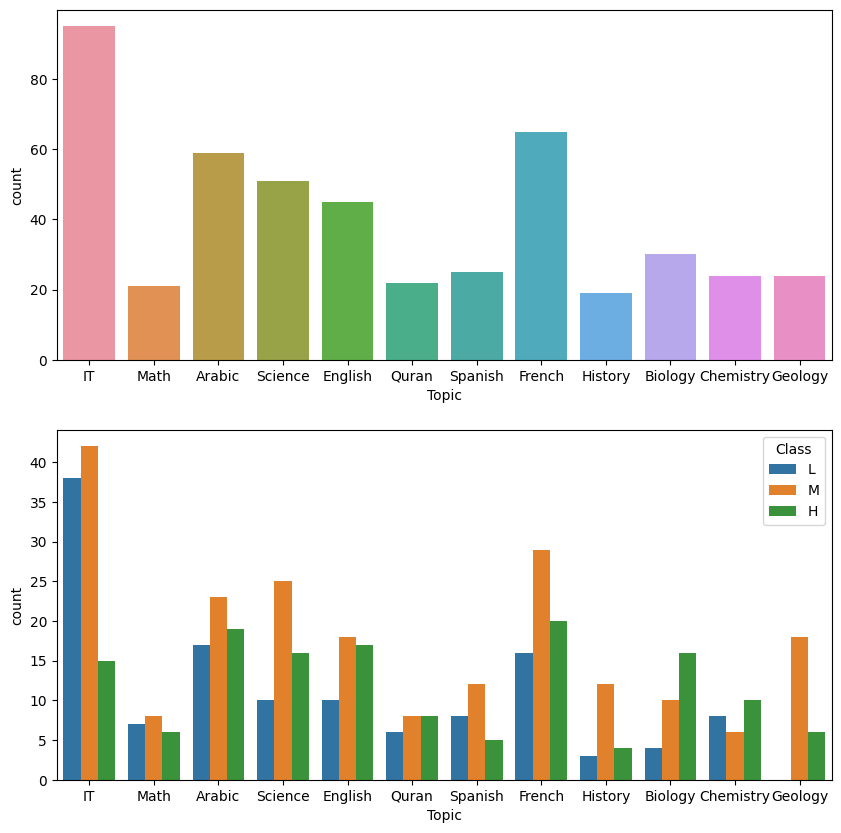

In [16]:
fig, axarr  = plt.subplots(2,figsize=(10,10))
sns.countplot(x='Topic', data=data, ax = axarr[0])
sns.countplot(x='Topic', hue='Class', data=data,hue_order = ['L', 'M', 'H'], ax = axarr[1])
plt.show()

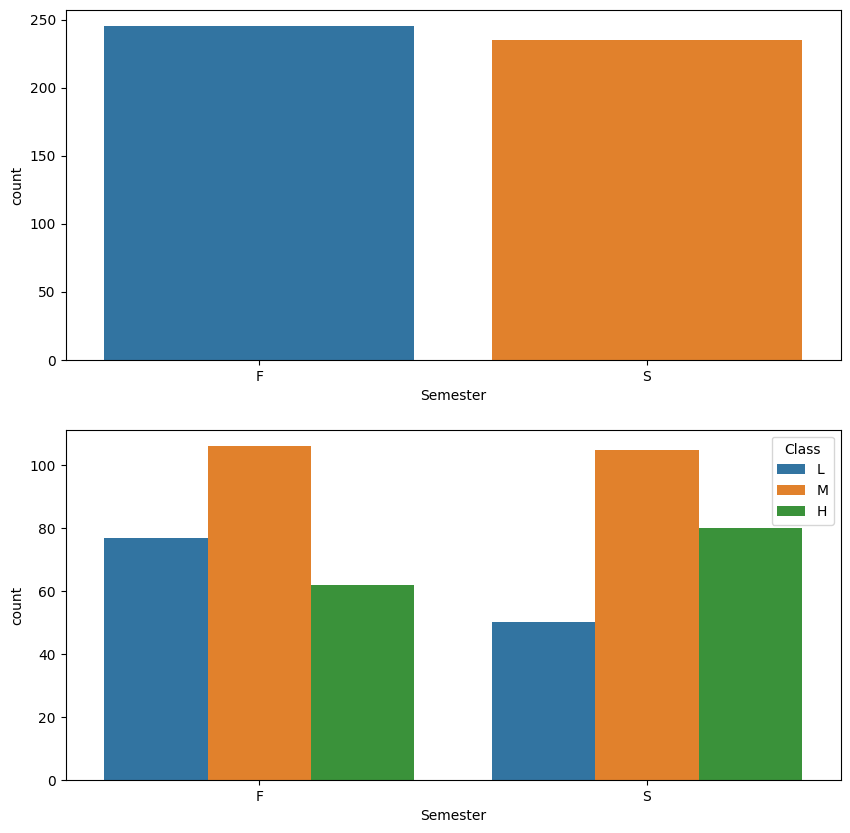

In [17]:
fig, axarr  = plt.subplots(2,figsize=(10,10))
sns.countplot(x='Semester', data=data, ax = axarr[0])
sns.countplot(x='Semester', hue='Class', data=data,hue_order = ['L', 'M', 'H'], ax = axarr[1])
plt.show()

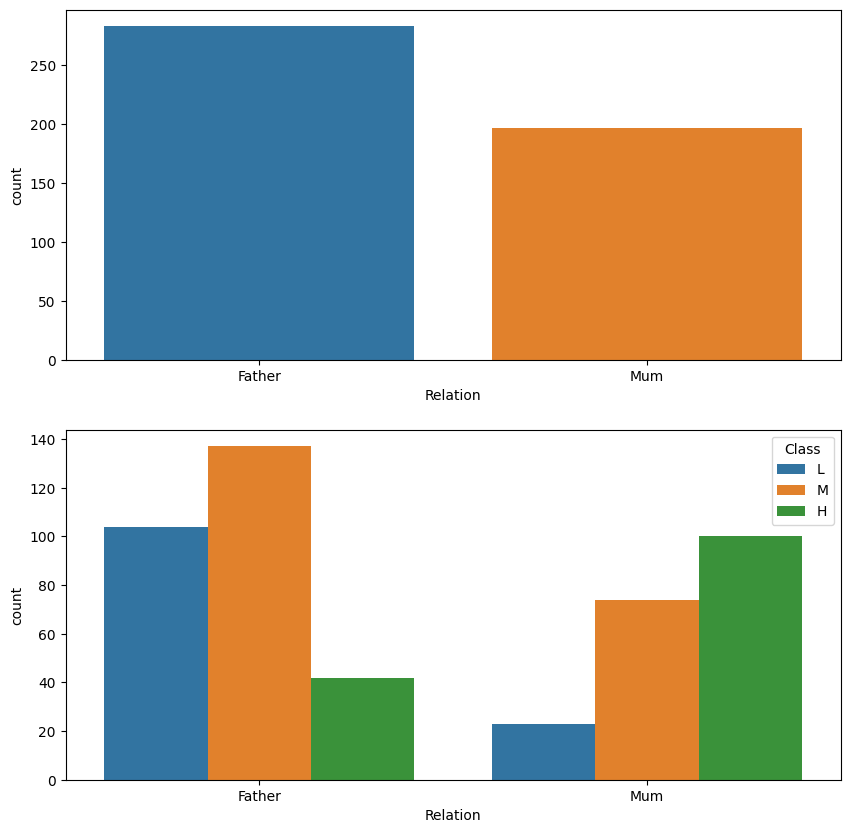

In [18]:
fig, axarr  = plt.subplots(2,figsize=(10,10))
sns.countplot(x='Relation', data=data, ax = axarr[0])
sns.countplot(x='Relation', hue='Class', data=data,hue_order = ['L', 'M', 'H'], ax = axarr[1])
plt.show()

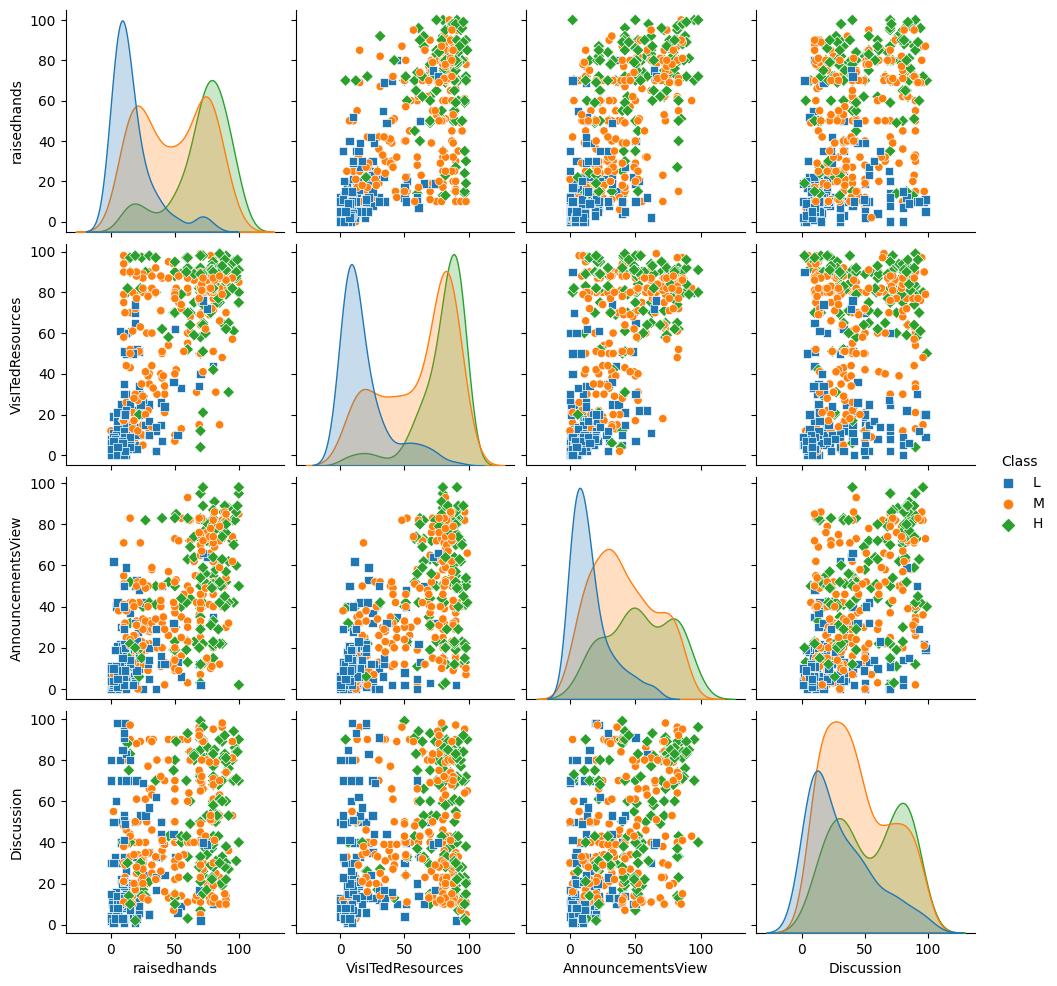

In [20]:
sns.pairplot(data, hue="Class", diag_kind="kde", hue_order = ['L', 'M', 'H'], markers=["o", "s", "D"])
plt.show()

In [21]:
data.groupby('Topic').median()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
Topic,,,,
Arabic,32.0,65.0,41.0,38.0
Biology,78.5,88.5,54.0,47.0
Chemistry,79.0,84.5,47.0,30.5
English,55.0,50.0,33.0,36.0
French,35.0,80.0,23.0,21.0
Geology,80.0,82.0,68.5,60.5
History,69.0,84.0,72.0,65.0
IT,20.0,25.0,10.0,40.0
Math,28.0,15.0,19.0,40.0


In [22]:
data.groupby('GradeID').median()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
GradeID,,,,
G-02,27.0,60.0,21.0,30.0
G-04,45.5,50.0,33.0,43.5
G-05,8.0,10.0,9.0,30.0
G-06,72.0,61.0,49.0,36.5
G-07,50.0,71.0,33.0,50.0
G-08,70.5,77.0,45.5,40.5
G-09,20.0,35.0,30.0,44.0
G-10,33.5,41.5,24.0,26.0
G-11,70.0,63.0,50.0,49.0


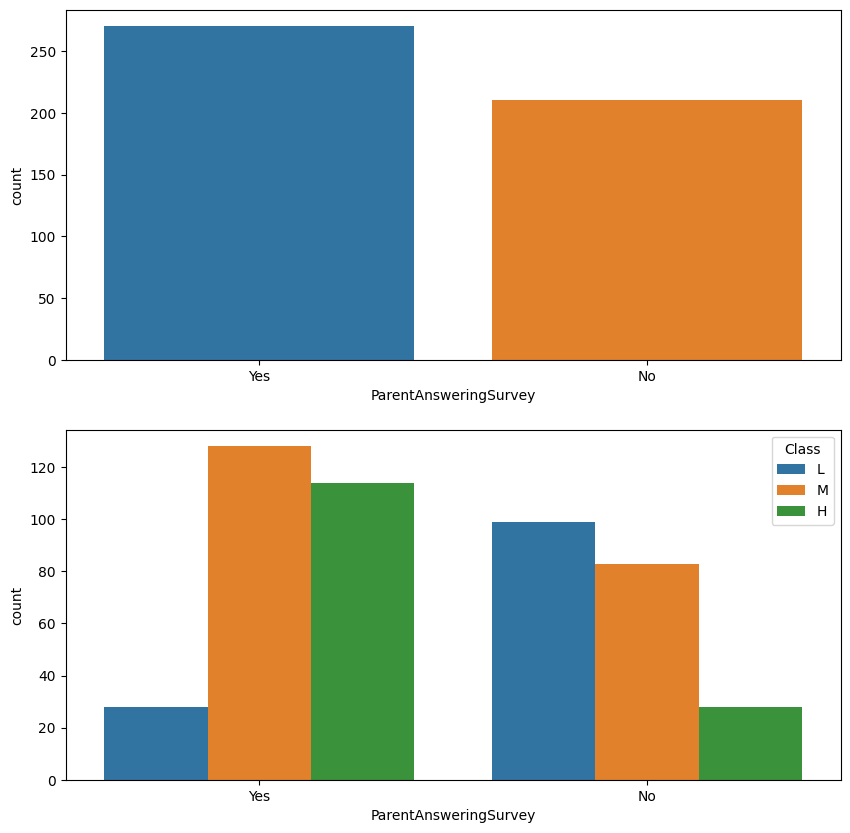

In [23]:
fig, axarr  = plt.subplots(2,figsize=(10,10))
sns.countplot(x='ParentAnsweringSurvey', data=data, order=['Yes', 'No'], ax = axarr[0])
sns.countplot(x='ParentAnsweringSurvey', hue='Class', data=data, order=['Yes', 'No'], hue_order = ['L', 'M', 'H'], ax = axarr[1])
plt.show()

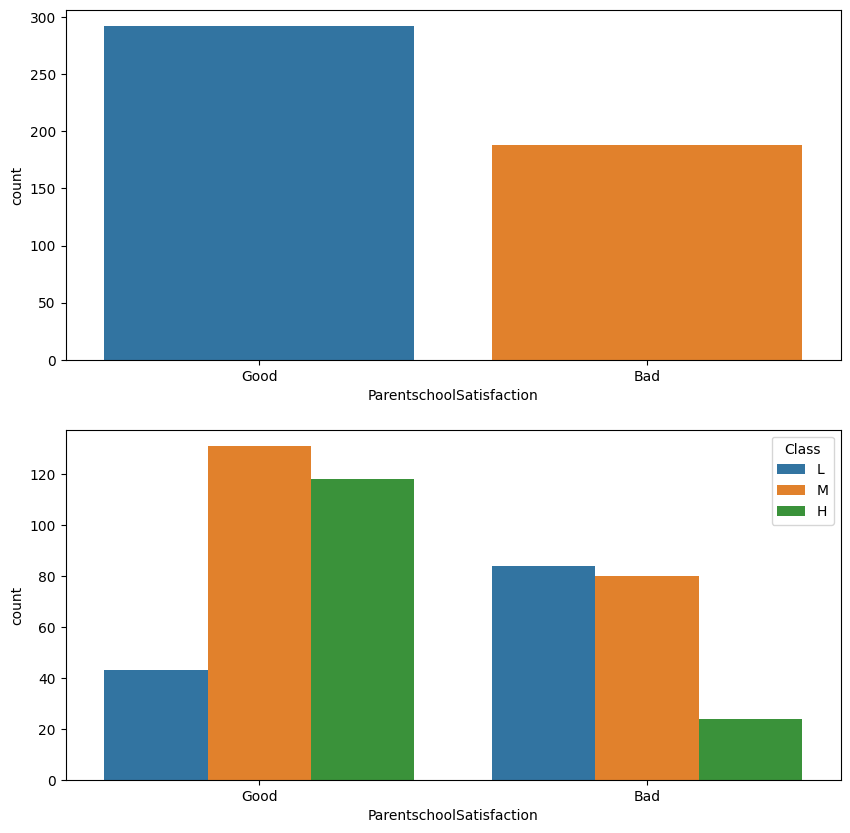

In [24]:
fig, axarr  = plt.subplots(2,figsize=(10,10))
sns.countplot(x='ParentschoolSatisfaction', data=data, order=['Good', 'Bad'], ax = axarr[0])
sns.countplot(x='ParentschoolSatisfaction', hue='Class', data=data, order=['Good', 'Bad'],hue_order = ['L', 'M', 'H'], ax = axarr[1])
plt.show()

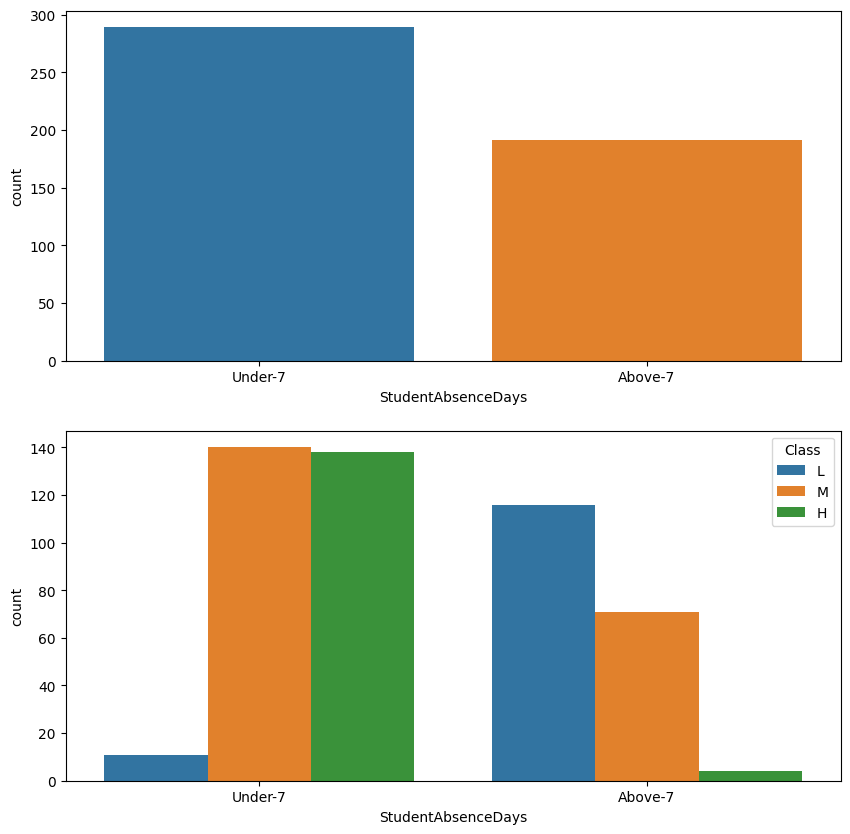

In [25]:
fig, axarr  = plt.subplots(2,figsize=(10,10))
sns.countplot(x='StudentAbsenceDays', data=data, order=['Under-7', 'Above-7'], ax = axarr[0])
sns.countplot(x='StudentAbsenceDays', hue='Class', data=data, order=['Under-7', 'Above-7'],hue_order = ['L', 'M', 'H'], ax = axarr[1])
plt.show()